In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
kvals = logspace(log10(0.0001), log10(0.1), num = -(log10(0.0001)-log10(0.1))/0.025 )

In [3]:
log10(kvals)

array([-4.        , -3.97478992, -3.94957983, -3.92436975, -3.89915966,
       -3.87394958, -3.8487395 , -3.82352941, -3.79831933, -3.77310924,
       -3.74789916, -3.72268908, -3.69747899, -3.67226891, -3.64705882,
       -3.62184874, -3.59663866, -3.57142857, -3.54621849, -3.5210084 ,
       -3.49579832, -3.47058824, -3.44537815, -3.42016807, -3.39495798,
       -3.3697479 , -3.34453782, -3.31932773, -3.29411765, -3.26890756,
       -3.24369748, -3.21848739, -3.19327731, -3.16806723, -3.14285714,
       -3.11764706, -3.09243697, -3.06722689, -3.04201681, -3.01680672,
       -2.99159664, -2.96638655, -2.94117647, -2.91596639, -2.8907563 ,
       -2.86554622, -2.84033613, -2.81512605, -2.78991597, -2.76470588,
       -2.7394958 , -2.71428571, -2.68907563, -2.66386555, -2.63865546,
       -2.61344538, -2.58823529, -2.56302521, -2.53781513, -2.51260504,
       -2.48739496, -2.46218487, -2.43697479, -2.41176471, -2.38655462,
       -2.36134454, -2.33613445, -2.31092437, -2.28571429, -2.26

In [4]:
from cosmoslik import param_shortcut, lsum, get_plugin, SlikDict, SlikPlugin, Slik
param = param_shortcut('start', 'scale')


In [5]:
cosmo = get_plugin('models.cosmology')(
            logA = param(3.3),
            ns = param(0.96),
            ombh2 = param(0.0221),
            omch2 = param(0.12),
            tau = param(0.13,min=0),
            theta = param(0.010413),
            omnuh2 = 0.000645,
            massive_neutrinos=3, #param(3,.2),
                    )

In [6]:
cosmo

{'As': 2.4e-09,
 'H0': None,
 'logA': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d790>,
 'massive_neutrinos': 3,
 'massless_neutrinos': 2.046,
 'model': '',
 'nrun': 0,
 'ns': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d7d0>,
 'ombh2': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d810>,
 'omch2': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d850>,
 'omk': 0,
 'omnuh2': 0.000645,
 'tau': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d890>,
 'theta': <cosmoslik.cosmoslik.param_shortcut at 0x10a15d8d0>,
 'w': -1}

In [13]:
for k in kvals:
    name = 'A_%1.2f'%((log10(k)))
    cosmo[name.replace('.','_')] = param(0, scale = 1)

In [14]:
cosmo

{'A_-1_00': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2410>,
 'A_-1_03': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d23d0>,
 'A_-1_05': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2390>,
 'A_-1_08': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2350>,
 'A_-1_10': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2310>,
 'A_-1_13': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d22d0>,
 'A_-1_15': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2290>,
 'A_-1_18': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2250>,
 'A_-1_20': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2210>,
 'A_-1_23': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d21d0>,
 'A_-1_25': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2190>,
 'A_-1_28': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2150>,
 'A_-1_30': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2110>,
 'A_-1_33': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d20d0>,
 'A_-1_35': <cosmoslik.cosmoslik.param_shortcut at 0x10a1d2090>,
 'A_-1_38': <cosmoslik.co

In [95]:
ksamples = logspace(-6, 1, num = 7.0*200)
pk = [10]*ksamples.size

from scipy.stats import lognorm
for k in kvals:
    pk+= exp(- (log(ksamples) - log(k))**2/2/0.025**2)

print len(kvals)

120


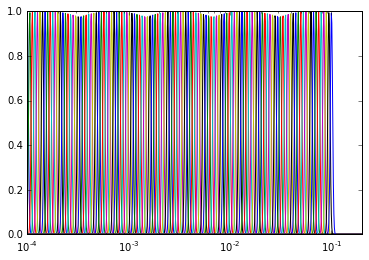

In [94]:
for k in kvals:
    semilogx(ksamples, exp(- (log(ksamples) - log(k))**2/2/0.025**2))
    xlim(1e-4,.2)

In [96]:
savetxt('pk_table',zip(ksamples, pk))

In [98]:
x = loadtxt('pk_table')

In [99]:
x.shape

(1400, 2)